<a href="https://colab.research.google.com/github/glo-code/ecommerce-analysis/blob/main/ecommerce_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import datetime

In [38]:
df=pd.read_csv('Amazon Sale Report.csv',parse_dates=True,on_bad_lines='skip',low_memory=False)
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False




```
Indagine sui clienti


```



Ordine ID e Status

In [39]:
data=pd.to_datetime(df['Date'])
df['months']=data.dt.month_name()
df['year']=data.dt.year
df['day']=data.dt.day


group=df.groupby(['day','months','year'])[['Order ID','Status']].value_counts().reset_index()
mask=np.where(group['count']<group['count'].max())[0]
print('Order less than max:',group['count'].iloc[mask].sum(),'in the day:',group.iloc[mask])
mask2=group['count'][group['count']==group['count'].max()]
'Order == max:',mask2.value_counts(),'in the day:',group.iloc[mask2.index]


<ipython-input-39-c4cc771dfd87>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data=pd.to_datetime(df['Date'])


Order less than max: 128951 in the day:         day months  year             Order ID                        Status  \
0         1  April  2022  403-9984530-4477124                       Shipped   
1         1  April  2022  404-5543645-7254764                       Shipped   
2         1  April  2022  407-3670630-4326760                       Shipped   
3         1  April  2022  406-9040211-5250700                       Shipped   
4         1  April  2022  406-7490066-8351568                       Shipped   
...     ...    ...   ...                  ...                           ...   
120373   31    May  2022  408-8718755-6521128                     Cancelled   
120374   31    May  2022  408-8678200-5500319  Shipped - Delivered to Buyer   
120375   31    May  2022  408-8645392-8413143  Shipped - Delivered to Buyer   
120376   31    May  2022  408-9302560-5550756                       Shipped   
120377   31    May  2022  408-9910860-9722745                     Cancelled   

        cou

('Order == max:',
 count
 12    2
 Name: count, dtype: int64,
 'in the day:',
        day months  year             Order ID     Status  count
 43715   11  April  2022  403-4984515-8861958    Shipped     12
 46478   11    May  2022  171-5057375-2831560  Cancelled     12)

Notiamo che il massimo di ordini da parte di un cliente è di 12 mentre il minimo è 1.Il massimo di ordini si è verificato sia ad aprile che a maggio, soltanto che a maggio si è trattato non di ordini spediti ma cancellati dallo stesso cliente.
Abbiamo invece contro i 2 ordini più alti, 91354 ordini minimi da più clienti.


In [40]:
count=group.groupby('months')['Status'].value_counts().unstack()
count=count.fillna(0).astype(int)
count

Status,Cancelled,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping
months,,,,,,,,,,,,,
April,6726,1,0,27176,0,11093,2,1,2,6,849,2,0
June,4957,577,262,22023,1,5908,0,30,911,5,340,119,8
March,18,0,0,123,0,16,0,0,0,0,1,0,0
May,5484,6,0,23504,0,9549,2,1,5,0,661,9,0


April
June
March
May


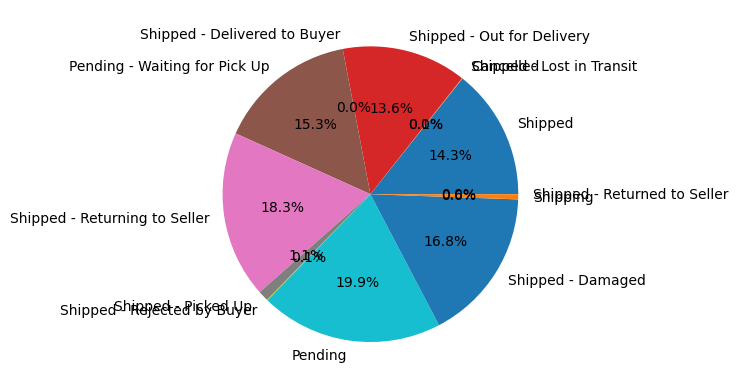

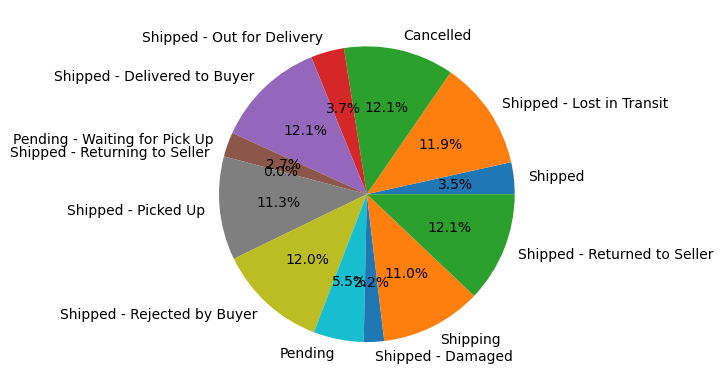

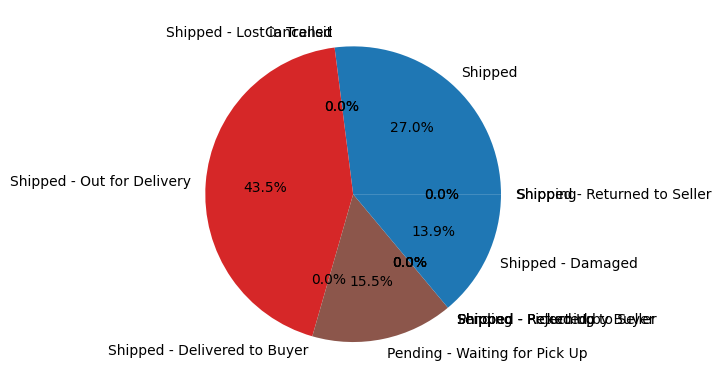

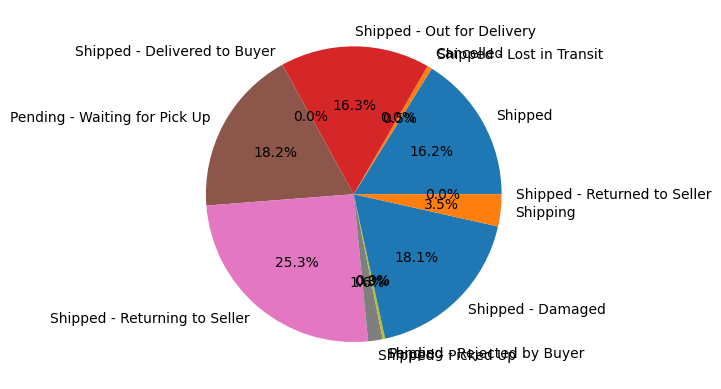

In [41]:
perc_precise=count/count.sum()*100
perc_precise.round(2).reset_index()


labels=set(df['Status'])

conteggio=0
for categorie in perc_precise:
    categorie=perc_precise.iloc[conteggio]
    print(categorie.name)
    ax,fig=plt.subplots()
    plt.pie(categorie,labels=labels,autopct='%1.1f%%')
    conteggio=conteggio+1
    if conteggio==len(perc_precise.index):
       break


Ordini per mese 0    37697
1    42040
2    49067
3      171
dtype: int64
Ordini totali 128975


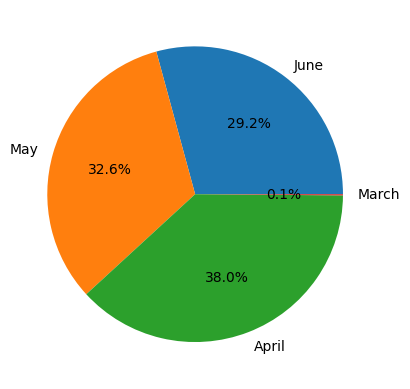

In [42]:
lista_mesi=['June','May','April','March']
ordini_totali=[]
for mese in lista_mesi:
    result=group['count'][group['months']==mese].sum()
    ordini_totali.append(result)

ordini_totali=pd.Series(ordini_totali)
print('Ordini per mese',ordini_totali)
print('Ordini totali',ordini_totali.sum())
perc=ordini_totali/ordini_totali.sum()*100
perc=perc.round(2)

ax,fig=plt.subplots()
plt.pie(perc,labels=lista_mesi,autopct='%1.1f%%')
plt.show()



Notiamo che ad Aprile abbiamo il maggior numero di ordini spediti (17.8%) e cancellati (15,5%). Abbiamo anche un modesto numero di ordini ritornati al venditore e in sospeso(16%). A giugno invece alto numero di ordini spediti ma anche cancellati anche se sono di meno rispetto ad aprile. Pochi però i resi e molti sospesi. A marzo nessun ordine sospeso e pochi cancellati ma ben il 44% degli ordini persi nel transito e 27% cancellati rispetto al 15,5% di aprile. E' il mese in cui si hanno avuti meno ordini. A maggio la maggior parte spediti e cancellati ed un numero moderato minore rispetto ad aprile di resi (21.6% rispetto al 16% di aprile). Pochi sospesi (18% rispetto ad aprile) e il 17% di persi nel transito e cancellati.

Quindi si è venduto di più tra aprile e maggio (47% e 40%) e modertamente a giugno (12%) e di meno a marzo (0.2%).



,Status,count
0,Shipped,60.32
1,Shipped - Delivered to Buyer,22.31
2,Cancelled,14.21
3,Shipped - Returned to Seller,1.51
4,Shipped - Picked Up,0.75
5,Pending,0.51
6,Pending - Waiting for Pick Up,0.22
7,Shipped - Returning to Seller,0.11
8,Shipped - Out for Delivery,0.03
9,Shipped - Rejected by Buyer,0.01


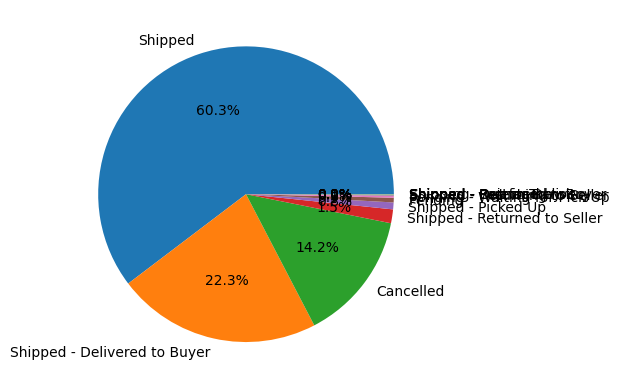

In [43]:
total=df['Status'].value_counts().sum()
status=df['Status'].value_counts().apply(lambda x:x/total*100).round(2).reset_index()
#status=status[status['count']!=0.0]
value=status['count']
fig,ax=plt.subplots()
labels=status['Status']
plt.pie(value,labels=labels,autopct='%1.1f%%')#,startangle=90,shadow=True,labeldistance=0.80,pctdistance=0.5)
status

Notiamo che la maggior parte degli ordini nei mesi indicati, sono stati spediti (circa il 58,8%) mentre il 25 % è stato spedito e consegnato al compratore. Il 14% invece è stato cancellato mentre soltanto 1.8% degli ordini è stato mandato indietro.
Soltanto per il 0,2% invece è stato effettuato il reso ma ancora l'ordine non è ritornato al venditore.



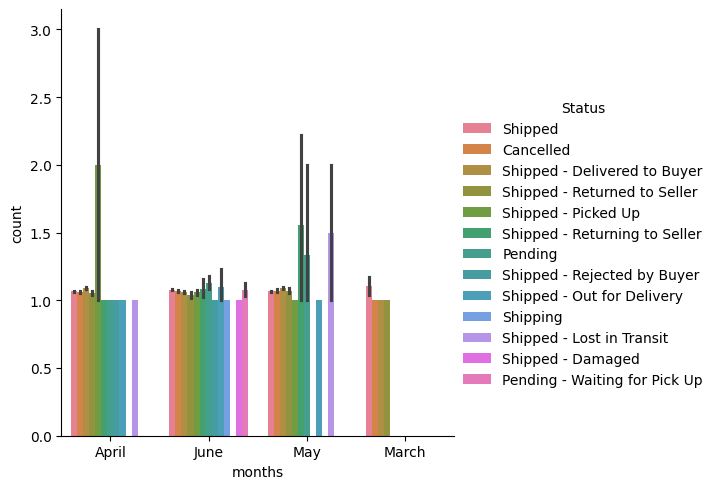

,day,months,year,Order ID,Status,count
0,1,April,2022,403-9984530-4477124,Shipped,7
1,1,April,2022,404-5543645-7254764,Shipped,4
2,1,April,2022,407-3670630-4326760,Shipped,4
3,1,April,2022,406-9040211-5250700,Shipped,3
4,1,April,2022,406-7490066-8351568,Shipped,3
...,...,...,...,...,...,...
120373,31,May,2022,408-8718755-6521128,Cancelled,1
120374,31,May,2022,408-8678200-5500319,Shipped - Delivered to Buyer,1
120375,31,May,2022,408-8645392-8413143,Shipped - Delivered to Buyer,1
120376,31,May,2022,408-9302560-5550756,Shipped,1


In [44]:

sns.catplot(group,x=group['months'],y=group['count'],kind='bar',hue='Status')
plt.show()
group

Tipo di prodotto acquistato


In [45]:
clothes=df['Category'].value_counts().reset_index()
perc_vestiti=clothes['count']/clothes['count'].sum()*100
vestiti_mesi=df.groupby('Category')['months'].value_counts().unstack()
vestiti_mesi.fillna(0).astype(int)
clothes.sum()

Category    SetkurtaWestern DressTopEthnic DressBlouseBott...
count                                                  128975
dtype: object

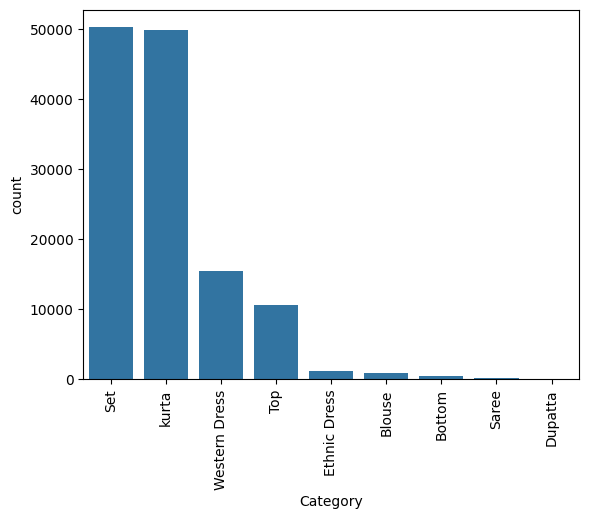

In [46]:
sns.barplot(clothes,x='Category',y='count')
plt.xticks(rotation=90)
plt.show()

Notiamo che i prodotti più acquistati in assoluto sono i set e la kurta e moderatamente il western dress e top. I prodotti meno acquistati sono ethnic dress, blouse, bottom e saree e ancora meno (soltanto 3 acquisti) il dupatta.
Dalle percentuali notiamo che il 39% acquista il set e il 38% il kurta mentre il 12% il western dress e soltanto l'8.2% il top.

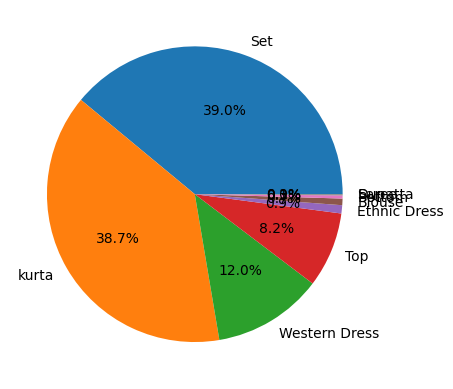

0    38.987401
1    38.671836
2    12.017833
3     8.235705
4     0.898624
5     0.717969
6     0.341151
7     0.127156
8     0.002326
Name: count, dtype: float64

In [47]:
ax,fig=plt.subplots()
plt.pie(perc_vestiti,labels=clothes['Category'],autopct='%1.1f%%')
plt.show()
perc_vestiti

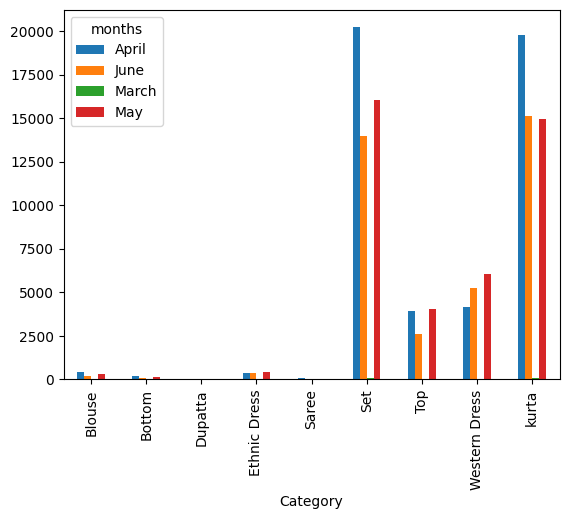

In [48]:
#ax,fig=plt.subplots()
vestiti_mesi.plot(kind='bar')
plt.show()

I set e i kurta sono stati più venduti nel mese di aprile, di più i set e i set anche nel mese di maggio sono stati più venduti rispetto ai kurta, che invece sono stati più venduti durante il mese di giugno. I top e i western dress invece hanno avuto poche vendite rispetto ai set e ai kurta ma i western dress nel mese di maggio e giugno sono stati più venduti rispetto ai top.

In [49]:

taglie=pd.crosstab(df['Category'],[df['Size']]).reset_index()
taglie.round(4)

Size,Category,3XL,4XL,5XL,6XL,Free,L,M,S,XL,XS,XXL
0,Blouse,0,0,0,0,211,136,154,140,133,28,124
1,Bottom,64,0,0,0,0,71,58,74,71,28,74
2,Dupatta,0,0,0,0,3,0,0,0,0,0,0
3,Ethnic Dress,172,0,0,0,0,192,180,176,194,88,157
4,Saree,0,0,0,0,164,0,0,0,0,0,0
5,Set,5795,48,61,81,0,8194,9347,7512,7572,5506,6168
6,Top,1184,0,0,0,0,1774,1825,1238,1855,949,1797
7,Western Dress,1915,0,0,0,0,2845,2587,2225,2379,1431,2118
8,kurta,5686,379,489,657,0,8920,8560,5725,8672,3131,7658


<Axes: xlabel='Size'>

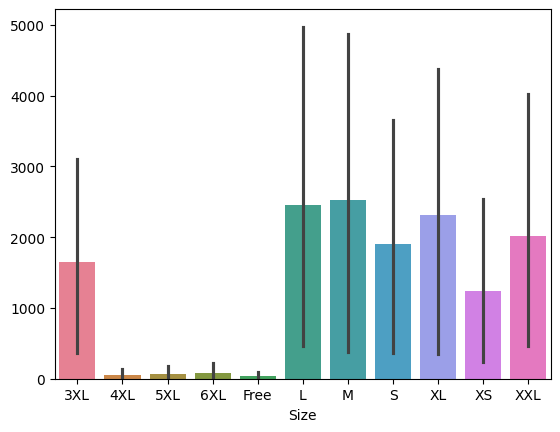

In [50]:
sns.barplot(taglie)

La taglia più venduta è la M/L mentre quella meno venduta è la XS e la 3XL. Mentre le taglie oltre la 3XL sono vendute ancora più raramente e anche la taglia Free.

Spesa


In [51]:
'Il prezzo massimo/minimo e medio sono:',df['Amount'].describe()[['max','min','mean']]
prezzo=df.groupby('months')['Amount'].mean().reset_index()
prezzo

,months,Amount
0,April,626.003046
1,June,661.484424
2,March,627.678086
3,May,663.356858


In [52]:
c=df.groupby('Category')['Amount'].value_counts().unstack()
c.fillna(0).astype(int)

Amount,0.00,199.00,218.10,229.00,236.19,237.14,241.00,246.67,248.00,249.00,...,2676.00,2698.00,2796.00,2860.00,2864.00,2894.00,3036.00,4235.72,5495.00,5584.00
Category,,,,,,,,,,,,,,,,,,,,,
Blouse,22,0,0,1,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
Bottom,12,0,1,14,0,0,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Dupatta,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ethnic Dress,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Saree,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Set,1013,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,1,1,1,1
Top,174,0,0,0,0,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
Western Dress,231,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
kurta,858,3,0,6,2,4,0,6,4,44,...,0,0,1,0,0,0,0,0,0,0


In media i clienti spendono 648,56 dollari per acquistare la merce in totale. Il prezzo medio ad Marzo è stato 627, a Aprile 626 per poi aumentare a Maggio 663 e scendere leggermente a Giugno 661. Quindi in teoria i prezzi sono saliti tra Maggio e Giugno.

Notiamo però che la maggior parte degli acquisti di alcuni articoli sono costati 0.00 e questa è una cosa strana. Anche se notiamo che tra i kurta ben 44 siano stati venduti a 249.00 mentre 14 bottom a 229.00 e 7 blouse a 249.00 ma il resto è minore.
Perchè la maggior parte degli articoli sono stati acquistati gratis?

In [53]:
promozioni=df.groupby('promotion-ids')['Amount'].value_counts().reset_index()
vestiti_promo=df.groupby('promotion-ids')[['Category','months']].value_counts()#.reset_index()#'amount' con category
vestiti_promo_2=vestiti_promo.copy().reset_index()
print(promozioni[promozioni['count']==promozioni['count'].max()])
promo=df['promotion-ids'].value_counts()#.reset_index()
#kurta=vestiti_promo[vestiti_promo['Category']=='kurta']
#kurta[kurta['Amount']==0.0].sum()
set(promozioni[promozioni['Amount']==0.0]['promotion-ids'].value_counts().reset_index()['promotion-ids'])
#set(vestiti_promo['Sales Channel '])
#perc_promo=promo['count']/promo['count'].sum()*100
#promo_1=promo.copy()
#promo_1['count']=perc_promo.round(2)
#promo_1['count'][(promo_1['count']<57.75)&(promo_1['count']>0.0)].sum()

#print(promo.sum())


vestiti_promo.unstack().fillna(0).astype(int)




                                      promotion-ids  Amount  count
24738  IN Core Free Shipping 2015/04/08 23-48-5-108   399.0   1754


months                                                            April  June  \
promotion-ids                                      Category                     
Amazon PLCC Free-Financing Universal Merchant A... Bottom             0     1   
                                                   Set                0     2   
                                                   Top                0     1   
                                                   Western Dress      0     1   
                                                   kurta              0     2   
...                                                                 ...   ...   
VPC-44571-41445561 Coupon                          Top                1     7   
VPC-44571-44201687 Coupon                          Top                0    28   
                                                   Western Dress      0    24   
VPC-44571-44201770 Coupon                          kurta              0    44   
VPC-44571-44201853 Coupon                          Set                0    25   

months                                                            March  May  
promotion-ids                                      Category                   
Amazon PLCC Free-Financing Universal Merchant A... Bottom             0    0  
                                                   Set                0    0  
                                                   Top                0    0  
                                                   Western Dress      0    0  
                                                   kurta              0    0  
...                                                                 ...  ...  
VPC-44571-41445561 Coupon                          Top                0   23  
VPC-44571-44201687 Coupon                          Top                0    0  
                                                   Western Dress      0    0  
VPC-44571-44201770 Coupon                          kurta              0    0  
VPC-44571-44201853 Coupon                          Set                0    0  

[10441 rows x 4 columns]

La promozione più utilizzata è VPC-44571-44201853, usata per circa 46100 volte,quindi si tratta di spedizione gratuita (Il numero più alto di articoli acquistati con questa promozione (1754) è costato 399.0 ed in particolare 1687 sono i kurta acquistati 49877 volte (3,38% degli acquisti)).
458 persone hanno invece utilizzato la promozione collegata alle carte platino, attraverso la quale amazon applica lo sconto sull'ordine permettendo però al venditore di ricevere il guadagno completo.
Questa promozione invece è stata utilizzata per comprare i kurta a 0.0 (291 quindi 0.58%) ma è strano perchè dovrebbe trattarsi di una promozione applicabile solo ai vendito
ri.
In generale 781 articoli sono stati venduti per 0.0 (128975 articolo in totale quindi 0,61%) ed è dovuto a tre promozioni sia questa e due coupon che dovrebbero abbassare il prezzo ma non rendere l'articolo gratuito. Sono tutte promozioni provenienti da Amazon.
In totale il 52% degli articoli sono stati comprati tramite la promozione IN Core Free Shipping 2015/04/08 23-48-5-108
come avevamo già notato mentre lo 0,57% con la promozione free-fancing ed anche sullo 0 è la percentuale dei coupon duplicates.


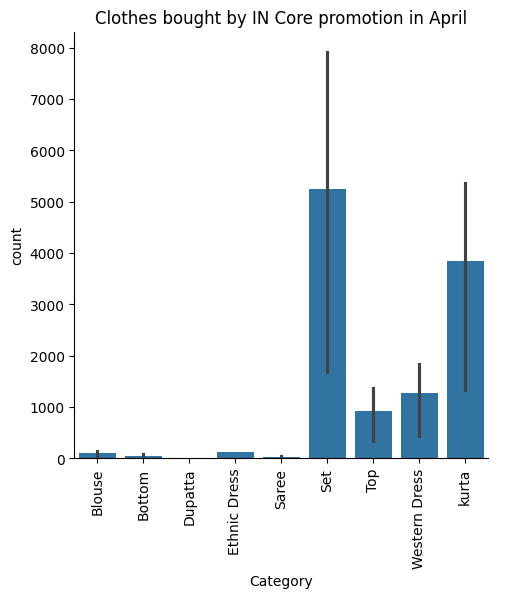

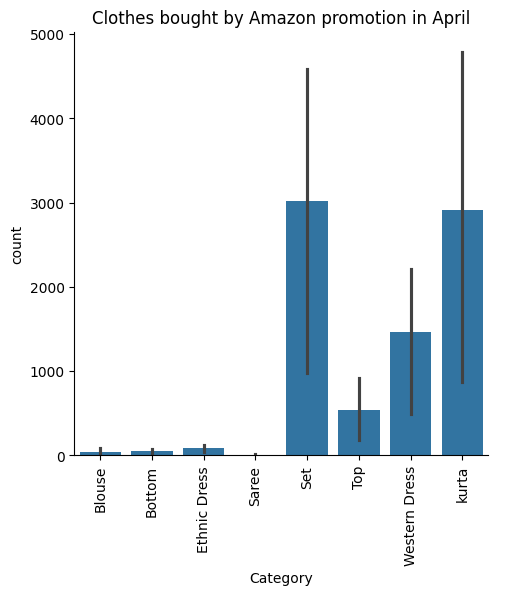

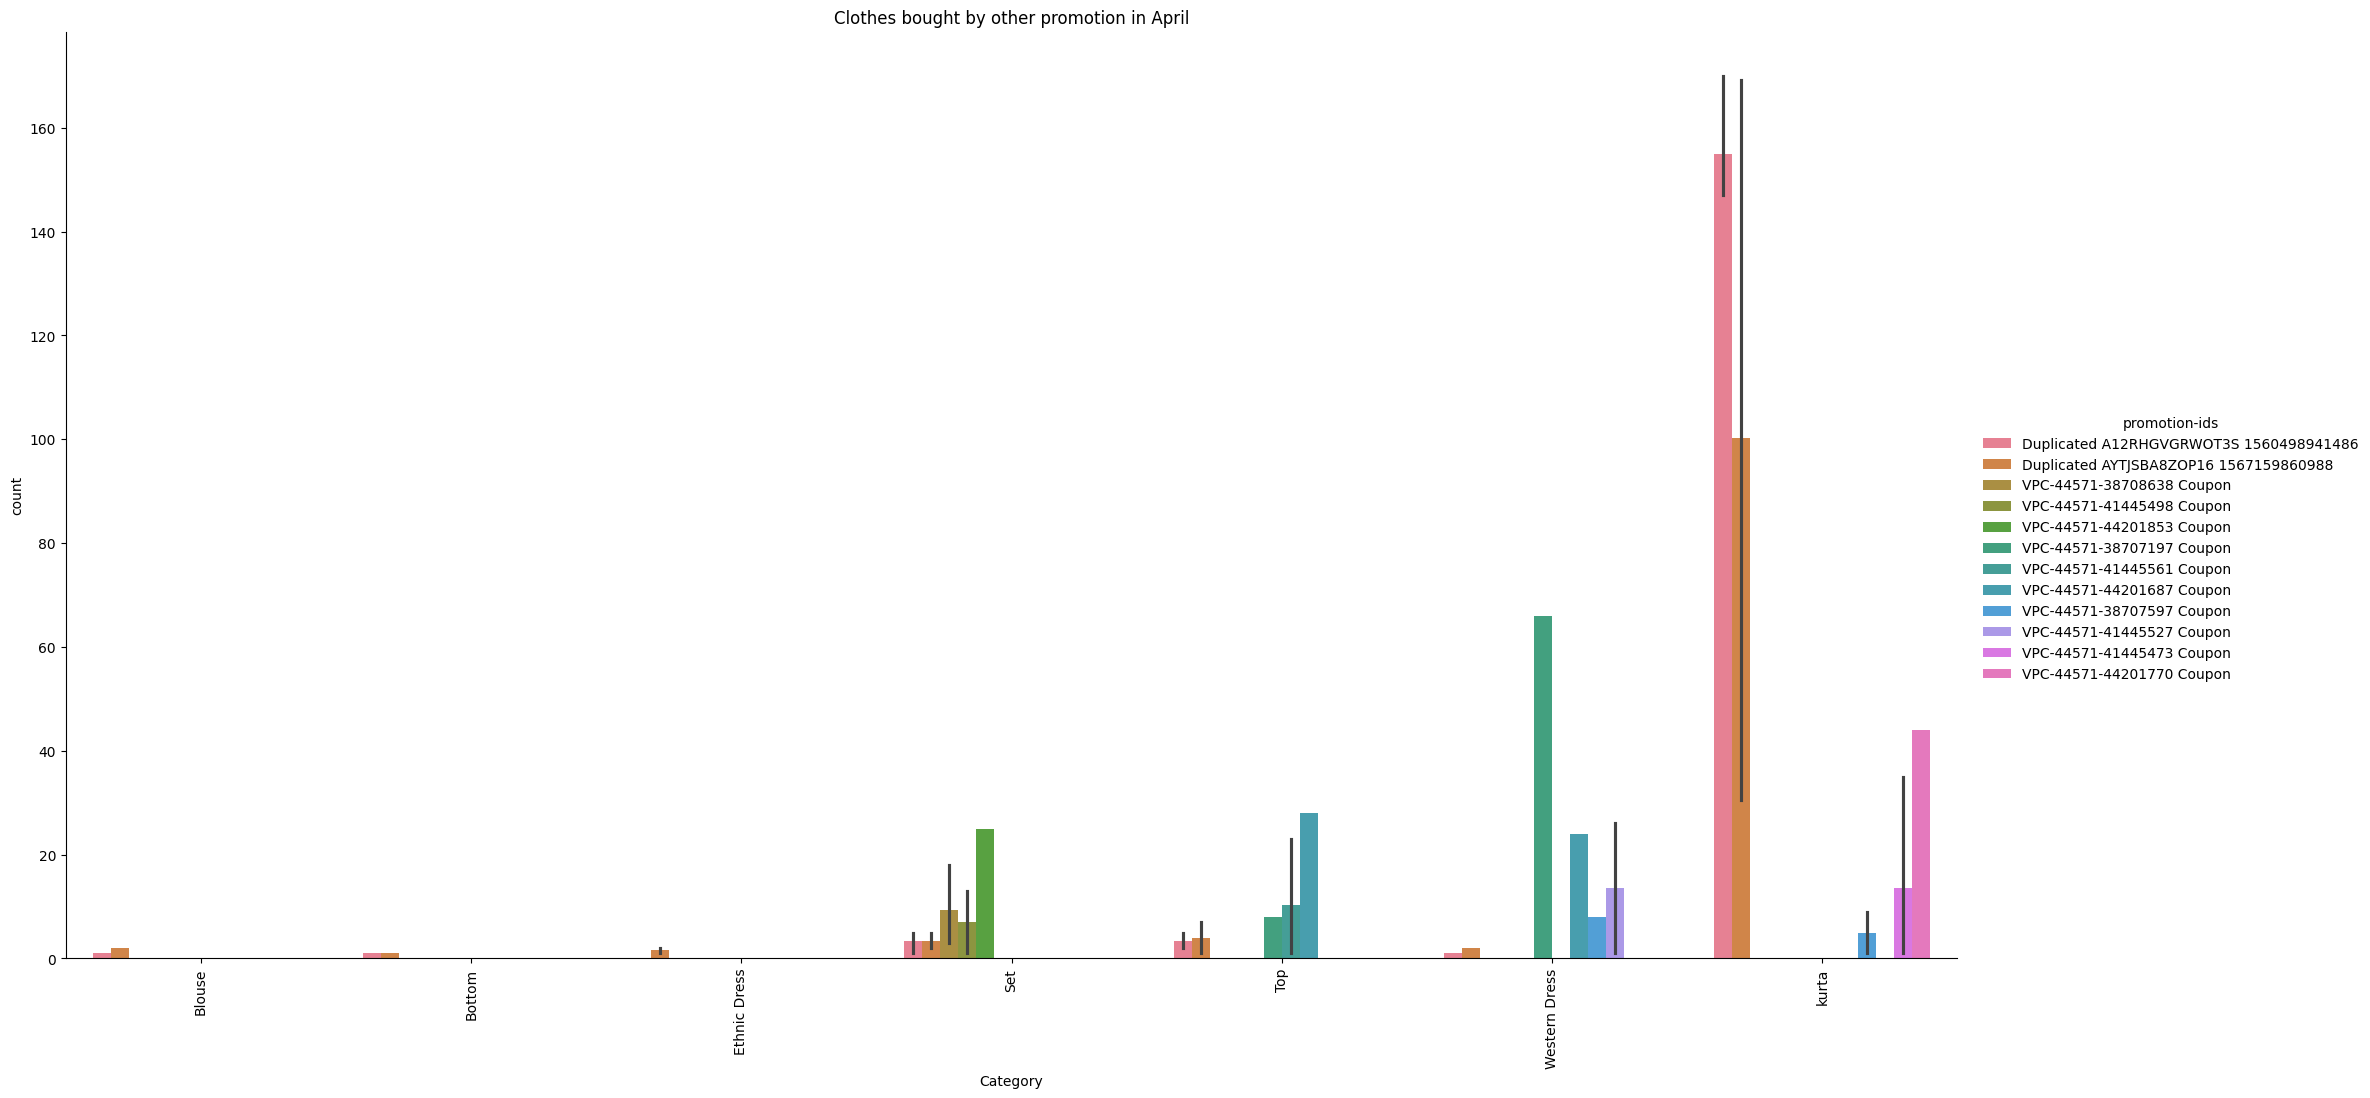

count
Category      promotion-ids                           months       
Blouse        Duplicated A12RHGVGRWOT3S 1560498941486 June        1
                                                      May         1
              Duplicated AYTJSBA8ZOP16 1567159860988  April       2
Bottom        Duplicated A12RHGVGRWOT3S 1560498941486 May         1
              Duplicated AYTJSBA8ZOP16 1567159860988  April       1
Ethnic Dress  Duplicated AYTJSBA8ZOP16 1567159860988  April       2
                                                      June        1
                                                      May         2
Set           Duplicated A12RHGVGRWOT3S 1560498941486 April       1
                                                      June        5
                                                      May         4
              Duplicated AYTJSBA8ZOP16 1567159860988  April       2
                                                      June        3
                                                      May         5
              VPC-44571-38708638 Coupon               April       3
                                                      June        7
                                                      May        18
              VPC-44571-41445498 Coupon               April       1
                                                      May        13
              VPC-44571-44201853 Coupon               June       25
Top           Duplicated A12RHGVGRWOT3S 1560498941486 April       5
                                                      June        2
                                                      May         3
              Duplicated AYTJSBA8ZOP16 1567159860988  April       7
                                                      June        1
                                                      May         4
              VPC-44571-38707197 Coupon               April       8
              VPC-44571-41445561 Coupon               April       1
                                                      June        7
                                                      May        23
              VPC-44571-44201687 Coupon               June       28
Western Dress Duplicated A12RHGVGRWOT3S 1560498941486 May         1
              Duplicated AYTJSBA8ZOP16 1567159860988  May         2
              VPC-44571-38707197 Coupon               April      66
              VPC-44571-38707597 Coupon               April       8
              VPC-44571-41445527 Coupon               April       1
                                                      May        26
              VPC-44571-44201687 Coupon               June       24
kurta         Duplicated A12RHGVGRWOT3S 1560498941486 April     147
                                                      June      170
                                                      May       148
              Duplicated AYTJSBA8ZOP16 1567159860988  April     198
                                                      June      119
                                                      March       1
                                                      May        83
              VPC-44571-38707597 Coupon               April       9
                                                      March       1
              VPC-44571-41445473 Coupon               April       1
                                                      June        5
                                                      May        35
              VPC-44571-44201770 Coupon               June       44

In [54]:
mask=vestiti_promo_2['promotion-ids'].str.contains('IN Core')
in_core=vestiti_promo_2[['promotion-ids','count','Category','months']][mask==True]
coupon=vestiti_promo_2[['promotion-ids','count','Category','months']][mask==False]
coupon=coupon[['promotion-ids','count','Category','months']][coupon['promotion-ids'].str.contains('Amazon')==False]

incore=in_core.groupby(['Category','months'])[['count','promotion-ids']].sum()

coupon=coupon.groupby(['Category','promotion-ids','months'])[['count']].sum()

amazon=vestiti_promo_2['promotion-ids'].str.contains('Amazon')
amazon_1=vestiti_promo_2[['promotion-ids','count','Category','months']][amazon==True]
amazon_2=amazon_1.groupby(['Category','months'])[['count','promotion-ids']].sum()





sns.catplot(incore,kind='bar',x='Category',y='count')
plt.xticks(rotation=90)
plt.title('Clothes bought by IN Core promotion in April')
plt.show()
sns.catplot(amazon_2,kind='bar',x='Category',y='count')
plt.title('Clothes bought by Amazon promotion in April')
plt.xticks(rotation=90)
plt.show()
sns.catplot(coupon,kind='bar',x='Category',y='count',hue='promotion-ids',aspect=2,height=10)
plt.xticks(rotation=90)
plt.title('Clothes bought by other promotion in April')
plt.show()

coupon



In aprile notiamo che le promozioni più usate per comprare (Western Dress) sono le promozioni duplicated. La promozione VCP invece è stata usata moderatamente per i western dress (spedizione gratuita) ma poco per quanto riguarda gli altri articoli come anche duplicated.
Quella di Amazon di più su kurta e set e lo stesso la promozioni IN CORE.


Perchè abbiamo quegli articoli venduti a 0.0?

In [55]:
print(df['Amount'][df['Amount']==0.0].value_counts())
articoli=df.groupby('Amount')[['months','year','Order ID','Status','promotion-ids','Courier Status']].value_counts().reset_index()
nulli=articoli[['Amount','months','year','Status','Order ID','promotion-ids','Courier Status']][articoli['Amount']==0.0]
count_ordini=nulli['months'].value_counts()
print(count_ordini)
lista_guadagno=[]
for months in ['April','May','June']:
    guadagno=df[['Amount','months']][df['months']==months]['Amount'].sum()
    income=[months,guadagno]
    lista_guadagno.append(income)


df_guadagni=pd.DataFrame(lista_guadagno)
df_guadagni

print(nulli['promotion-ids'].value_counts().reset_index()[nulli['promotion-ids'].value_counts().reset_index()['promotion-ids'].str.contains('VPC')]['count'].sum())

nulli['Order ID'].duplicated().value_counts() # non ci sono ordini gratis fatti dallo stesso cliente
stato=nulli['Status'].value_counts()
stato/stato.sum()*100
stato.sum()

nulli['Courier Status'].value_counts()

df['Amount'][df['Amount']==0.0]


Amount
0.0    2343
Name: count, dtype: int64
months
April    323
May      275
June     183
Name: count, dtype: int64
2


212       0.0
374       0.0
385       0.0
388       0.0
392       0.0
         ... 
128550    0.0
128612    0.0
128685    0.0
128804    0.0
128837    0.0
Name: Amount, Length: 2343, dtype: float64

Notiamo che nessuno di questi ordini senza pagamento è stato cancellato e che non ci sono ordini gratis dallo stesso cliente. Questi ordini gratis si sono avuti nel numero massimo ad Aprile mentre moderatamente a Giugno e poco meno a Maggio.
Potrebbero anche essere valori anomali.Comunque ad Aprile si è guadagnato di più mentre a Maggio moderatamente e a Giugno ancora meno. Questi potrebbero essere il motivo di questo calo di fatturato tra Aprile e Giugno?
Notiamo che la maggior parte di questi ordini è stato consegnato al cliente (87%) mentre 50 sono stati resi (6%), 5 sospesi (0.64%), 2 persi nel transito (0.25%) e 2 sono in fase di reso (in totale 57 di questi ordini sono nulli per questo motivo). Nessuno di loro si tratta di ordini cancellati ma 13 sono non spediti
Invece la maggior parte ha utilizzato la promozione Amazon (779) mentre soltanto 2 VCP coupon.
- 57 ordini nulli per reso,sospeso,perso nel transito e in fase di reso su 781 + 13 non spediti (in tutto 8,96%)
- 779 comprati con la promozione Amazon (non sappiamo cosa comporti) su 781 99,74%
- La maggior parte di loro si è avuta nel mese di Aprile
- Potrebbe anche essere un errore, in quanto abbiamo 7795 valori nulli su 128975 incassi 6,54%
- Sono 781 ordini nulli su 128975 ordini in totale (0,61%)


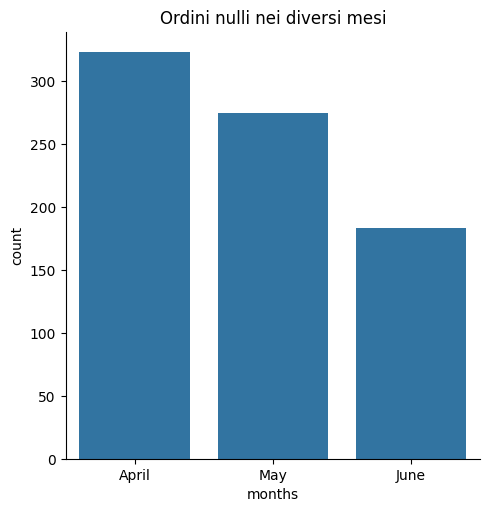

In [56]:


sns.catplot(data=count_ordini,kind='bar')
plt.title('Ordini nulli nei diversi mesi')
plt.show()





Valori anomali e nulli sulla colonna Amount?

In [57]:
df['Amount'].describe()
new_df=df.copy()
#new_df['Amount']=new_df['Amount'][new_df['Amount']!=0.0]
new_df['Amount']

0          647.62
1          406.00
2          329.00
3          753.33
4          574.00
           ...   
128970     517.00
128971     999.00
128972     690.00
128973    1199.00
128974     696.00
Name: Amount, Length: 128975, dtype: float64

In [58]:
df['Amount'][df['Amount'].isnull()==True]
new_df['Amount'].fillna(new_df['Amount'].median())
new_df['Amount'].describe()

count    121180.000000
mean        648.561465
std         281.211687
min           0.000000
25%         449.000000
50%         605.000000
75%         788.000000
max        5584.000000
Name: Amount, dtype: float64

In [59]:
#metodo percentili
sup=df['Amount'].quantile(0.99)
inf=df['Amount'].quantile(0.01)
out=df['Amount'].loc[(df['Amount']>sup)&(df['Amount']<inf)]
out

Series([], Name: Amount, dtype: float64)

In [60]:
#metodo zscore
superiore=df['Amount']+3*df['Amount'].std()
inferiore=df['Amount']-3*df['Amount'].std()
outliers=df['Amount'].loc[(df['Amount']>superiore)&(df['Amount']<inferiore)]
print(outliers)

Series([], Name: Amount, dtype: float64)


In [61]:
index=np.where(new_df['Amount']==0.0)[0]
new_df['free_order']=new_df['Amount'].iloc[index]
new_df['free_order']=new_df['free_order'].fillna('Order not null')
new_df['free_order']=new_df['free_order'].astype(str).replace(0.0,'Order null')
count=new_df['free_order'].iloc[index].value_counts().sum()

new_df['Amount']=new_df['Amount'][new_df['Amount']!=0.0]
print(new_df['free_order'],count,len(df['Amount']),len(new_df['Amount']))

0         Order not null
1         Order not null
2         Order not null
3         Order not null
4         Order not null
               ...      
128970    Order not null
128971    Order not null
128972    Order not null
128973    Order not null
128974    Order not null
Name: free_order, Length: 128975, dtype: object 2343 128975 128975


Category
Set              3487
Western Dress      50
kurta              34
Ethnic Dress       19
Top                 7
Saree               3
Name: count, dtype: int64
Valori tolti al di sopra del limite superiore [   102    146    243 ... 128873 128911 128957]
Numero valori anomali 3600 Lunghezza nuova colonna 11395


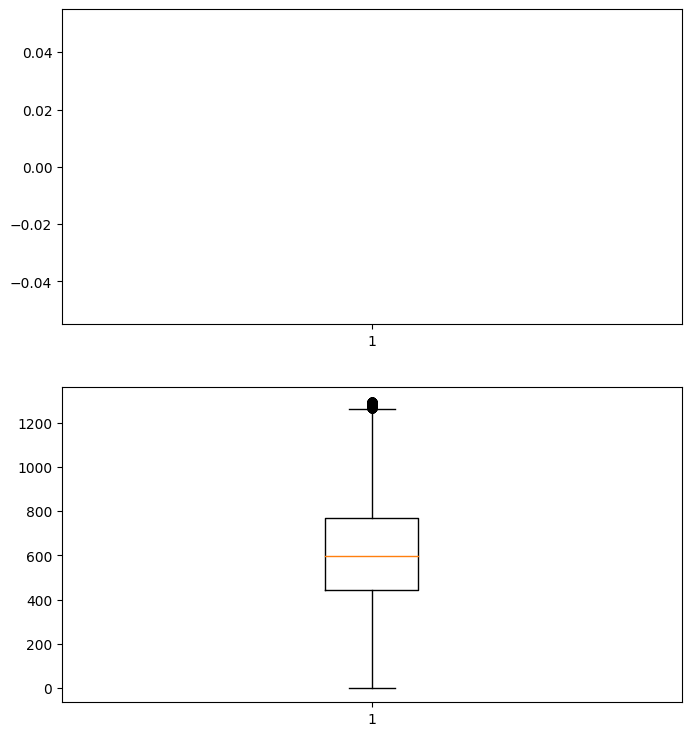

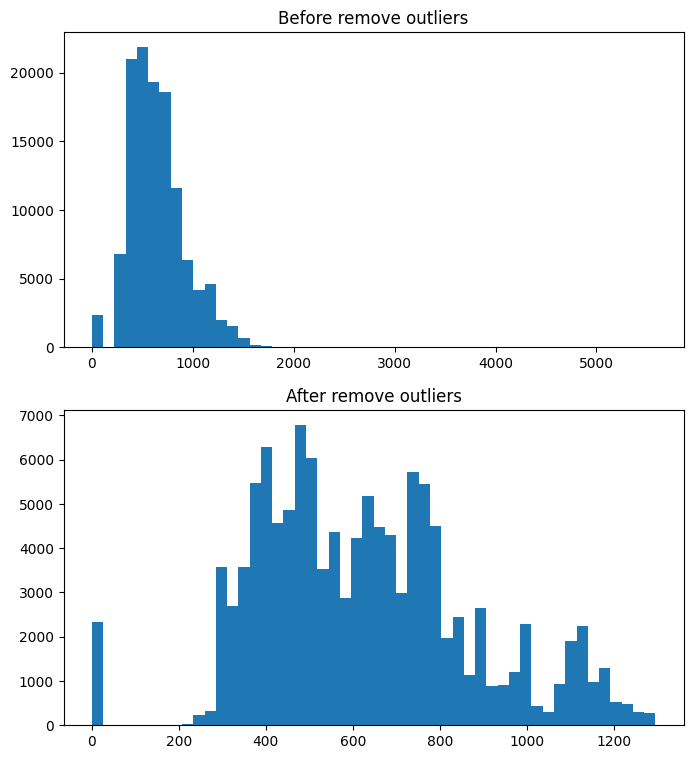

Before count    121180.000000
mean        648.561465
std         281.211687
min           0.000000
25%         449.000000
50%         605.000000
75%         788.000000
max        5584.000000
Name: Amount, dtype: float64
After count    117580.000000
mean        624.465036
std         246.652047
min           0.000000
25%         442.000000
50%         599.000000
75%         771.000000
max        1296.000000
Name: Amount, dtype: float64
Asimmetria (0.8854806405409467, 0.35247195950323157) Curtosi (3.0037534034823583, 0.07287847189953922)


In [62]:
#metodo interquartile
q1=df['Amount'].quantile(0.25)
q3=df['Amount'].quantile(0.75)
irq=q3-q1
upper=q3+(1.5*irq)
lower=q1-(1.5*irq)
#new_df=df.loc[(df['Amount']<upper)&(df['Amount']>lower)]
indice=np.array(df['Amount'][(df['Amount']>upper)&(df['Amount']>lower)].reset_index()['index'])
num=len(indice)
out=df['Category'].iloc[indice].value_counts()
print(out)
new_df=df.loc[(df['Amount']<upper)&(df['Amount']>lower)]
print('Valori tolti al di sopra del limite superiore',indice)
print('Numero valori anomali',num,'Lunghezza nuova colonna',len(df['Amount'])-len(new_df['Amount']))


fig,ax=plt.subplots(2,1,figsize=(8,9))
ax[1].boxplot(new_df['Amount'])
ax[0].boxplot(df['Amount'])
plt.plot()


fig,ax=plt.subplots(2,1,figsize=(8,9))
ax[1].hist(new_df['Amount'],bins=50)
ax[1].set_title('After remove outliers')
ax[0].hist(df['Amount'],bins=50)
ax[0].set_title('Before remove outliers')
plt.show()
print('Before',df['Amount'].describe())
print('After',new_df['Amount'].describe())
print('Asimmetria',(df['Amount'].skew(),new_df['Amount'].skew()),'Curtosi',(df['Amount'].kurt(),new_df['Amount'].kurt()))

In [63]:
guadagno=new_df.groupby('months')['Amount'].sum().reset_index()
guadagno_prima=df.groupby('months')['Amount'].sum().reset_index()
print(guadagno)
print(guadagno_prima)
somma2=new_df['Amount'].sum()
somma1=df['Amount'].sum()
print(somma1,somma2)

  months       Amount
0  April  27451387.67
1   June  21751054.39
2  March     98388.85
3    May  24123768.02
  months       Amount
0  April  28838708.32
1   June  23425809.38
2  March    101683.85
3    May  26226476.75
78592678.29999998 73424598.93


- I valori anomali abbassano il guadagno mentre gli ordini gratis non hanno un uguale impatto, anzi lasciano il guadagno invariato (vedremo poi la correlazione).

- Il numero dei valori anomali identificati dall'intervallo interquartile è 3600 su 117580 (3,06%).
Dall'istogramma si nota chiaramente che con i valori anomali l'intervallo dei dati era compreso tra 0 e 16000 (i valori erano maggiormente compresi prima di 1000 e calavano dopo 1000 fino a scomparire prima di 2000 (max 5584)) mentre senza è un intervallo più piccolo tra 0 e 5000 (maggiormente compresi tra da metà 200 a 800 per poi calare fino a 1200 (max 1299)).
La distribuzione in entrambi casi è poco asimmetrica ma nel primo caso la curtosi, quindi la concentrazione dei dati intorno alla media era maggiore mentre nel secondo caso questa togliendo i valori anomali è stata ridotta molto.
I dati sembrano distribuiti più ampiamente.


- Si è venduto di meno a marzo, picco basso in assoluto, e giugno quindi ai cambiamenti di stagione.

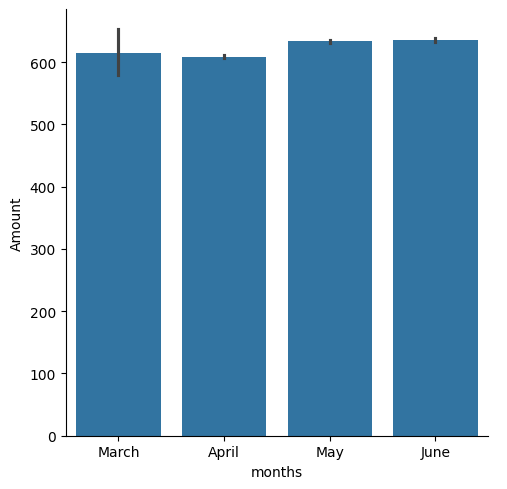

In [64]:
new_df['Amount']
xticks=['March','April','May','June']
sns.catplot(data=new_df,x='months',y='Amount',order=xticks,kind='bar')
plt.show()

Altri fattori che incidono sul guadagno

Shop da cui i clienti acquistano

In [73]:

channel=new_df[['Fulfilment','fulfilled-by','Sales Channel ','ship-service-level']].apply(lambda x:x.value_counts()).fillna(0).astype(int)
perc_channel=channel/channel.sum()*100
perc_channel.round(1)


,Fulfilment,fulfilled-by,Sales Channel,ship-service-level
Amazon,69.0,0.0,0.0,0.0
Amazon.in,0.0,0.0,100.0,0.0
Easy Ship,0.0,100.0,0.0,0.0
Expedited,0.0,0.0,0.0,68.2
Merchant,31.0,0.0,0.0,0.0
Standard,0.0,0.0,0.0,31.8


In [1]:
new_df[['ship-service-level','fulfilled-by','Fulfilment']][(new_df['ship-service-level']=='Standard')|(new_df[['fulfilled-by','Fulfilment']].isin(['Easy Ship','Merchant']))].value_counts()

NameError: name 'new_df' is not defined

- I clienti hanno comprato su Amazon (117580) e la maggior parte ha beneficiato della spedizione espressa (68%,80167) rispetto a quella standard (31%,915).

- I fornitori principali sono: al primo posto Amazon seguito da Merchant e Easy Ship (in ugual numero) (69% per Amazon e 31% per gli altri due).

- Il tipo di spedizione dipende anche dal tipo di fornitore.
La spedizione standard invece è stata utlizzata di più su Merchant che su Amazon (Merchant è uno strumento per far comparire la propria merce sulla barra di ricerca google da cui i clienti possono acquistare più facilmente e che promuove
la merce).
Lo stesso numero di persone ha utilizzato quella standard su Easy Ship.
Quindi Amazon ha il primato sulla spedizione espressa.


In [66]:
new_df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,months,year,day
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN,April,2022,30
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,April,2022,30
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN,April,2022,30
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN,April,2022,30
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN,April,2022,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,TELANGANA,500013.0,IN,NaN,False,NaN,False,May,2022,31
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,May,2022,31
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,TELANGANA,500049.0,IN,NaN,False,NaN,False,May,2022,31
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,May,2022,31
